# Please take our survey!! 

# Its only three questions and 30 seconds of your time!

# https://www.surveymonkey.com/r/PCLC9T8

# Welcome to Part 2- Cleaning Data with Python


In [2]:

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

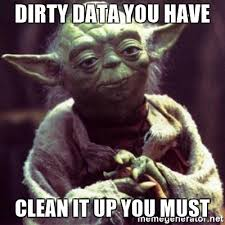

### Highly Recommended Link
##### https://pandas.pydata.org/pandas-docs/stable/reference/index.html

### Six Topics of Cleaning Data

- Missing Data (i.e. NaN)
<br>
- Irregular Data (Outliers)
<br>
- Incorrect Defaults (i.e. 9999 or 0)
<br>
- Unnecessary Data — Repetitive Data, Duplicates and more
<br>
- Mixed Data- Mixed types of data in one column
<br> 
- Unstructued Data — Typically Categorical Data with need for Regex or fix data type

### 1. Missing Data

In [60]:
DC = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
DC

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [59]:
DC=DC.dropna(subset=['toy'])
DC

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [61]:
DC = DC.dropna()
DC

,name,toy,born
1,Batman,Batmobile,1940-04-25


### 2. Irregular Data (Outliers)

In [62]:
#Lets us Boston Data Set
#https://scikit-learn.org/stable/datasets/index.html#boston-dataset

from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


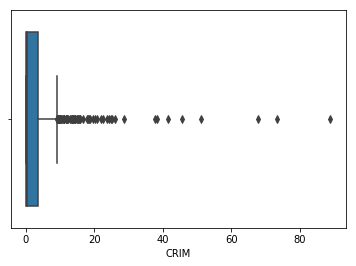

In [63]:
ax = sns.boxplot(x=boston["CRIM"])

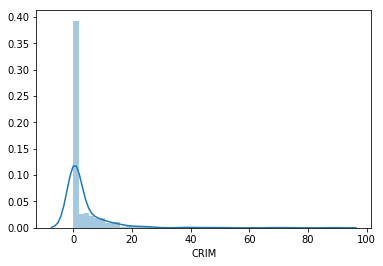

In [64]:
# Combined distributionplot
sns.distplot(boston["CRIM"])

In [65]:
#Calculate Skewness
print(boston["CRIM"].skew())
boston["CRIM"].describe()

5.223148798243851


count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [10]:
print(boston["CRIM"].quantile(0.10))
print(boston["CRIM"].quantile(0.90))

0.038195
10.753


In [66]:
boston["CRIM"]= np.where(boston["CRIM"] <0.038195, 0.038195,boston["CRIM"])
boston["CRIM"]= np.where(boston["CRIM"] >10.753, 10.753,boston["CRIM"])
print(boston["CRIM"].skew())

1.4036647064377474


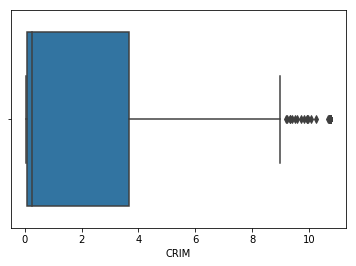

In [12]:
ax = sns.boxplot(x=boston["CRIM"])

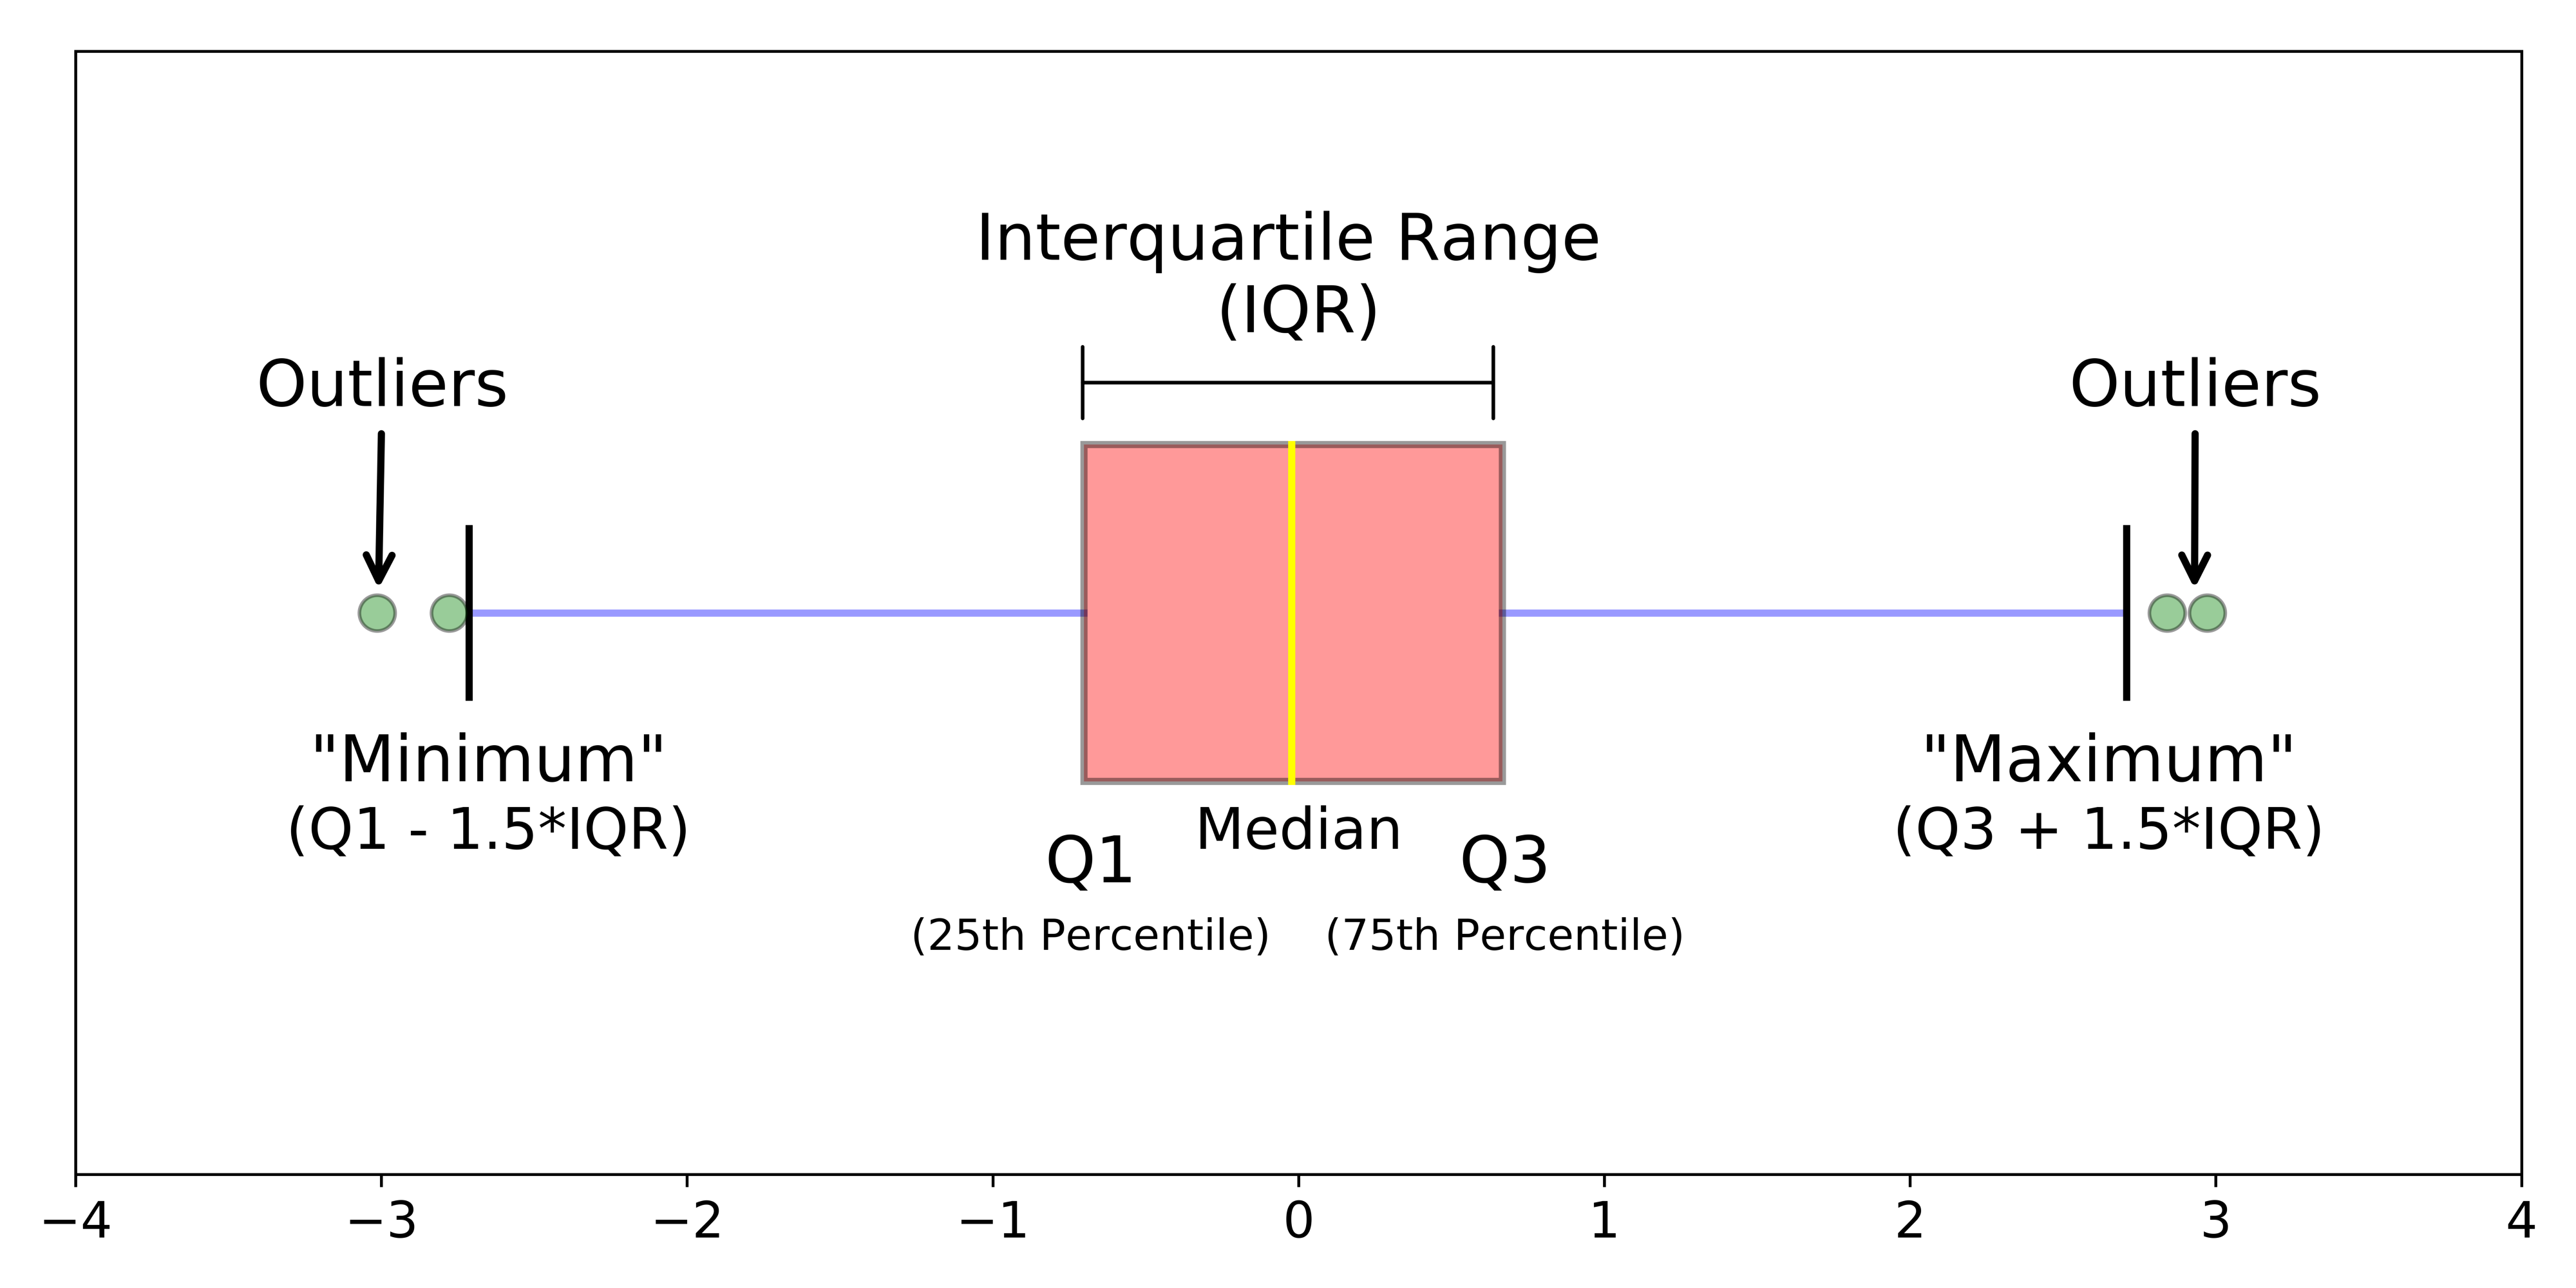

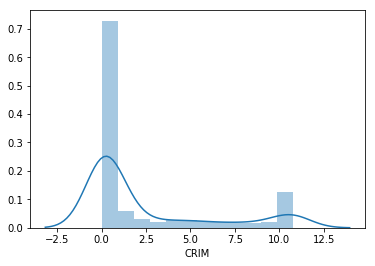

In [67]:
# Combined distributionplot
sns.distplot(boston["CRIM"])

### 3. Incorrect Defaults

In [68]:
avengers = pd.DataFrame({"name": ['Iron_Man', 'Hawkeye', 'Thor'],
                   "skill": ['Rich', 'Archery', 'God'],
                   "age": [42, 38, 9999]})
avengers

,name,skill,age
0,Iron_Man,Rich,42
1,Hawkeye,Archery,38
2,Thor,God,9999


In [15]:
avengers["age"]= np.where(avengers["age"]==9999, 2500, avengers["age"])
avengers

,name,skill,age
0,Iron_Man,Rich,42
1,Hawkeye,Archery,38
2,Thor,God,2500


In [16]:
#other option is row level

# Location based replacement
avengers.loc[2,'age'] = 1000
avengers

,name,skill,age
0,Iron_Man,Rich,42
1,Hawkeye,Archery,38
2,Thor,God,1000


### 4. Unnecessary Data 

In [69]:
food = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
food

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [70]:
food.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [71]:
food.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [20]:
food.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


### 5. Mixed Data Types

In [72]:
DC2 = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": ['12', 'Batmobile', 'Bullwhip']})
DC2

,name,toy
0,Alfred,12
1,Batman,Batmobile
2,Catwoman,Bullwhip


In [73]:
# creating bool series 
DC2["bool_series"]= DC2["toy"].str.isalpha() 
DC2

,name,toy,bool_series
0,Alfred,12,False
1,Batman,Batmobile,True
2,Catwoman,Bullwhip,True


### 6. Unstructured Data

In [74]:
# Let's create a Dataframe 
NLP = pd.DataFrame({'City':['New York (City)', 'Parague', 'New Delhi (Delhi)', 'Venice', 'new Orleans'], 
                    'Event':['Music', 'Poetry', 'Theatre', 'Comedy', 'Tech_Summit'], 
                    'Cost':[10000, 5000, 15000, 2000, 12000]}) 
NLP

,City,Event,Cost
0,New York (City),Music,10000
1,Parague,Poetry,5000
2,New Delhi (Delhi),Theatre,15000
3,Venice,Comedy,2000
4,new Orleans,Tech_Summit,12000


In [24]:
# Importing re package for using regular expressions 
import re 
  
# Function to clean the names 
def Clean_names(City_name): 
    # Search for opening bracket in the name followed by 
    # any characters repeated any number of times 
    if re.search('\(.*', City_name): 
  
        # Extract the position of beginning of pattern 
        pos = re.search('\(.*', City_name).start() 
  
        # return the cleaned name 
        return City_name[:pos] 
  
    else: 
        # if clean up needed return the same name 
        return City_name 
          
# Updated the city columns 
NLP['City'] = NLP['City'].apply(Clean_names) 
  
# Print the updated dataframe 
print(NLP) 

          City        Event   Cost
0    New York         Music  10000
1      Parague       Poetry   5000
2   New Delhi       Theatre  15000
3       Venice       Comedy   2000
4  new Orleans  Tech_Summit  12000


# Project- Titanic Dataset
### https://www.kaggle.com/c/titanic

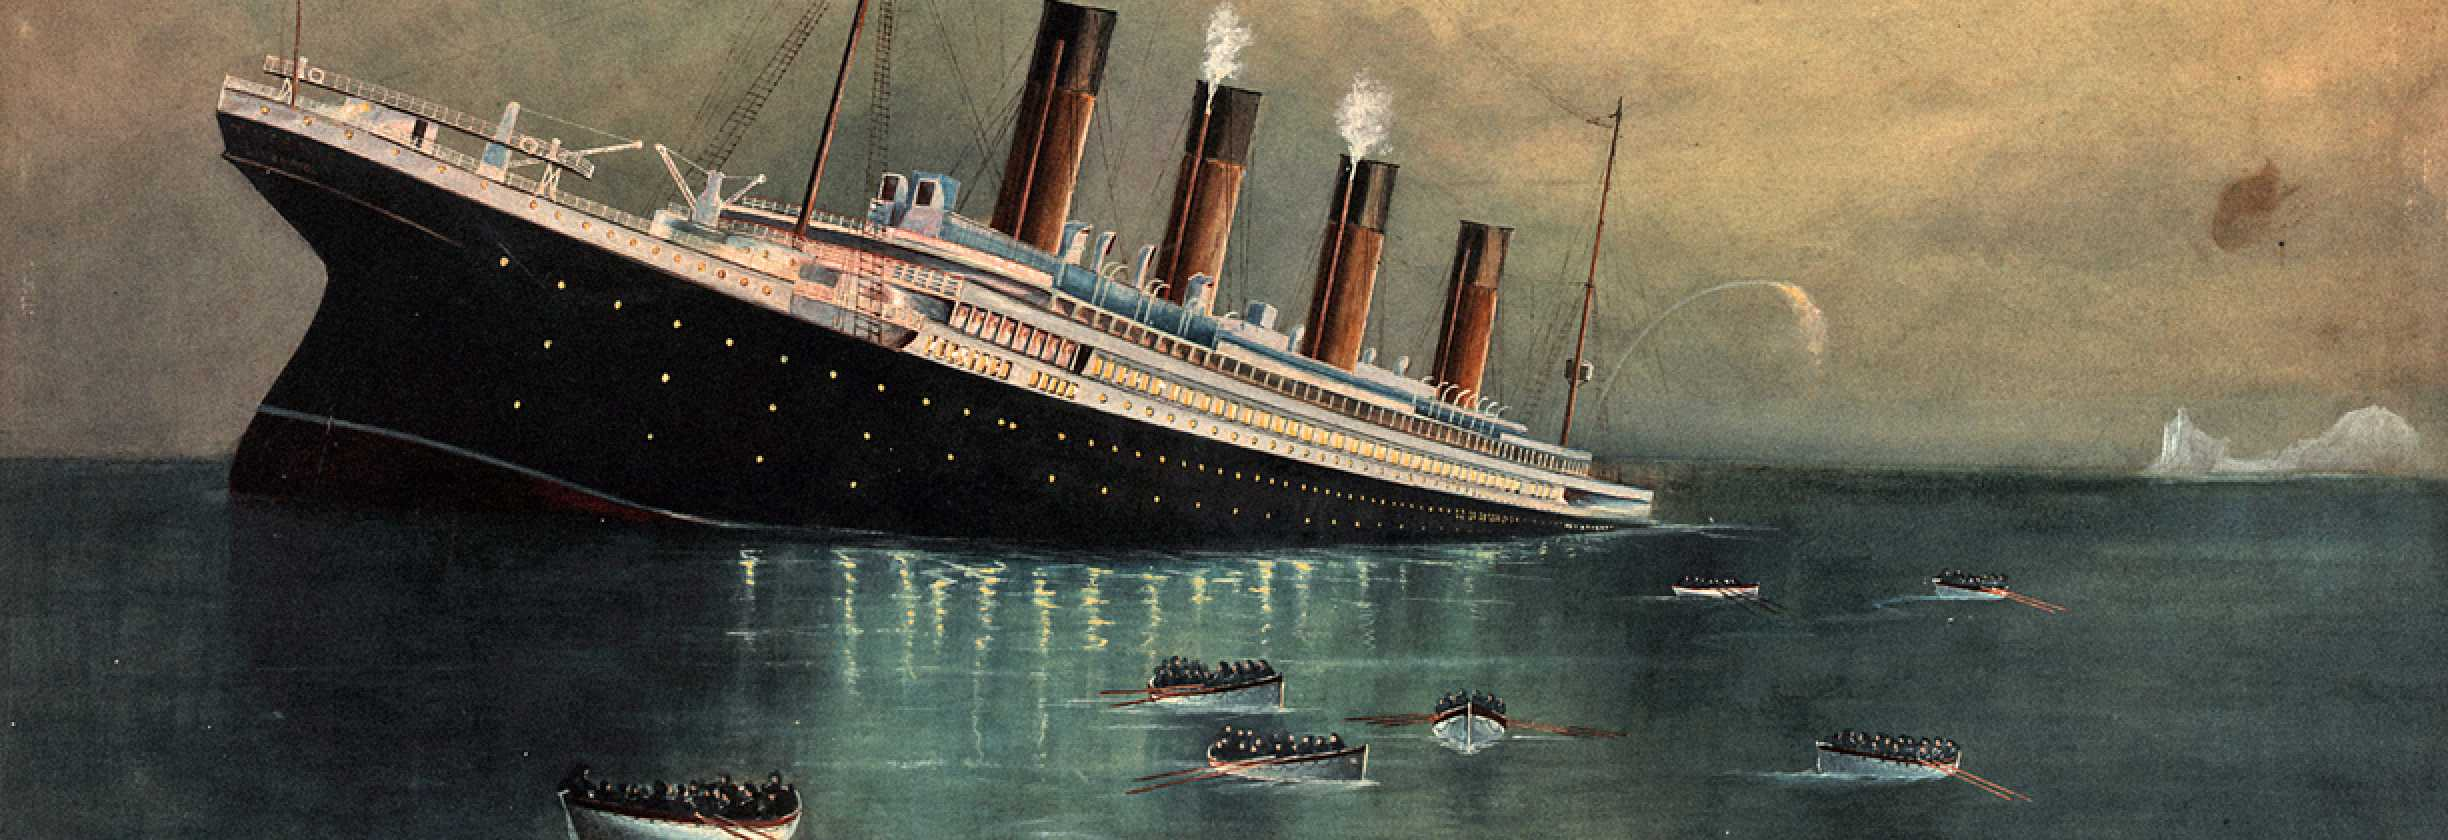

### Understanding the data
- Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
<br>
- survival: Survival (0 = No; 1 = Yes)
<br>
- name: Name
<br>
- sex: Sex
<br>
- age: Age
<br>
- sibsp: Number of Siblings/Spouses Aboard
<br>
- parch: Number of Parents/Children Aboard
<br>
- ticket: Ticket Number
<br>
- fare: Passenger Fare (British pound)
<br>
- cabin: Cabin
<br>
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [75]:
# Load Titanic Dataset
df = pd.read_csv('train.csv')

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# Data description
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


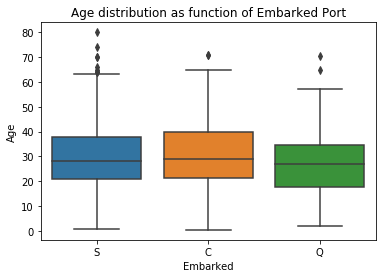

In [30]:
sns.boxplot(x='Embarked', y='Age', data=df)
plt.title("Age distribution as function of Embarked Port")
plt.show()

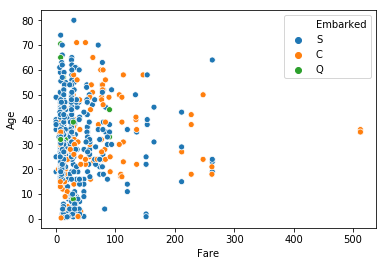

In [77]:
ax = sns.scatterplot(x="Fare", y="Age",hue='Embarked', data=df)

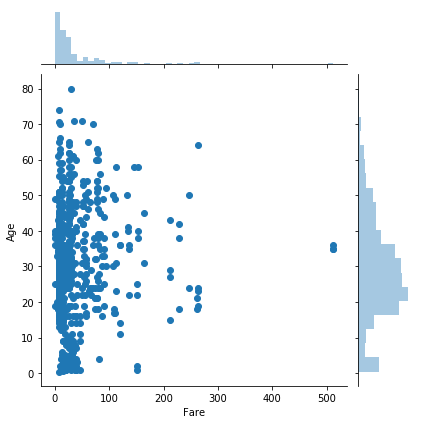

In [32]:
sns.jointplot(x="Fare", y="Age", data=df);

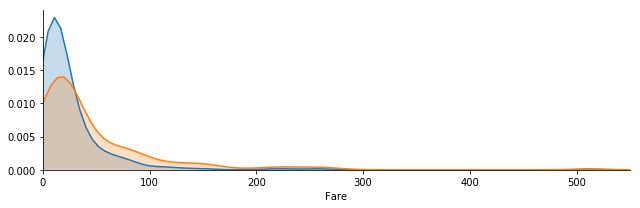

In [33]:
fg = sns.FacetGrid(df, hue="Sex", aspect=3)
fg.map(sns.kdeplot, "Fare", shade=True)
fg.set(xlim=(0, 550));

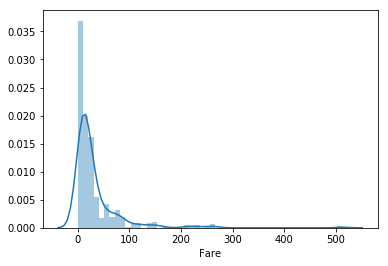

In [34]:
# Combined distributionplot
sns.distplot(df['Fare'])


In [35]:
# Compute missing data
def missing_values():
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    
    return missing_values

In [36]:
values = missing_values()
print(values)

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000
<function missing_values at 0x000002934A1B4EA0>


In [37]:
def percent_missing():
    
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
        
    return percent_missing

In [38]:
missing = percent_missing()
print(missing)

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 20.0%
SibSp - 0.0%
Parch - 0.0%
Ticket - 0.0%
Fare - 0.0%
Cabin - 77.0%
Embarked - 0.0%
<function percent_missing at 0x000002934A2D3620>


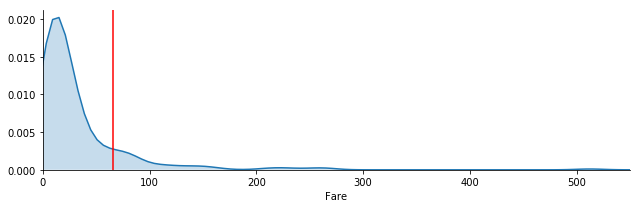

In [39]:

fg = sns.FacetGrid(df, aspect=3)
fg.map(sns.kdeplot, "Fare", shade=True)
fg.set(xlim=(0, 550));
plt.axvline(66,color='red')

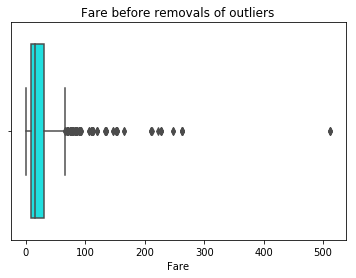

In [42]:
sns.boxplot(x='Fare', color='aqua',data=df)
plt.title("Fare before removals of outliers")
plt.show()

In [43]:
# Phase 3 Identify Outliers
q1, q3= np.percentile(df['Fare'],[25,75])

In [44]:
q1

7.9104

In [45]:
q3

31.0

In [46]:
iqr = q3 - q1
iqr

23.0896

In [47]:
lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)

print(lower_bound)
print(upper_bound)

-3.9552000000000005
77.5


In [78]:
# Function to find IQR
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn , [25,75])
    IQR=q3-q1 
    print('The IQR is:', IQR)
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    print('The lower range is:',lower_range)
    print('The upper range is:',upper_range)
    return lower_range,upper_range

In [54]:
outlier_treatment(df.Fare)
#df[(df.Fare < lower_range) | (df.Fare > upper_range)]

The IQR is: 23.0896
The lower range is: -26.724
The upper range is: 65.6344


(-26.724, 65.6344)

In [81]:
df["Fare"]= np.where(df["Fare"] >65.6344, 65,df["Fare"]).copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.0000,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


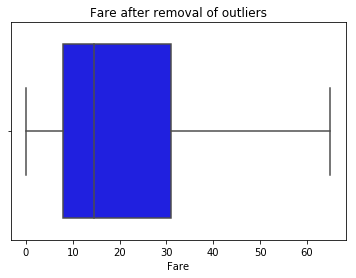

In [82]:
sns.boxplot(x='Fare', color='blue',data=df)
plt.title("Fare after removal of outliers")
plt.show()

In [ ]:
#Move on to Age
Age_Drop=df.dropna(subset=['Age']).copy()
Age_Drop.info()

In [83]:
#Age is a column name for our train data
mean_value=df['Age'].mean()
print(mean_value)
df['Age']=df['Age'].fillna(mean_value)
df

29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.0000,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [ ]:
#this will replace all NaN values with the mean of the non null values
#For Median
median_value=df['Age'].median()
print(median_value)
df['Age']=df['Age'].fillna(median_value)
df

In [ ]:
mean=df['Fare'].mean()
mean
df['Fare'] = np.where(df['Fare'] >66,mean,df['Fare'])
df

In [84]:
df[(df.Fare < lower_range) | (df.Fare > upper_range)]

NameError: name 'lower_range' is not defined

# Conclusion

#### Its important to remember that knowing how to clean data is one of THE most important skillsets 

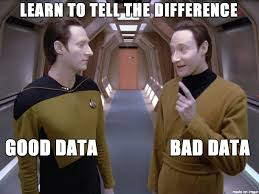